# Music Recommendation System with Python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [2]:
data = pd.read_csv("E:/Downloads/SpotifyFeatures.csv/SpotifyFeatures.csv")
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [4]:
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


# Analysis

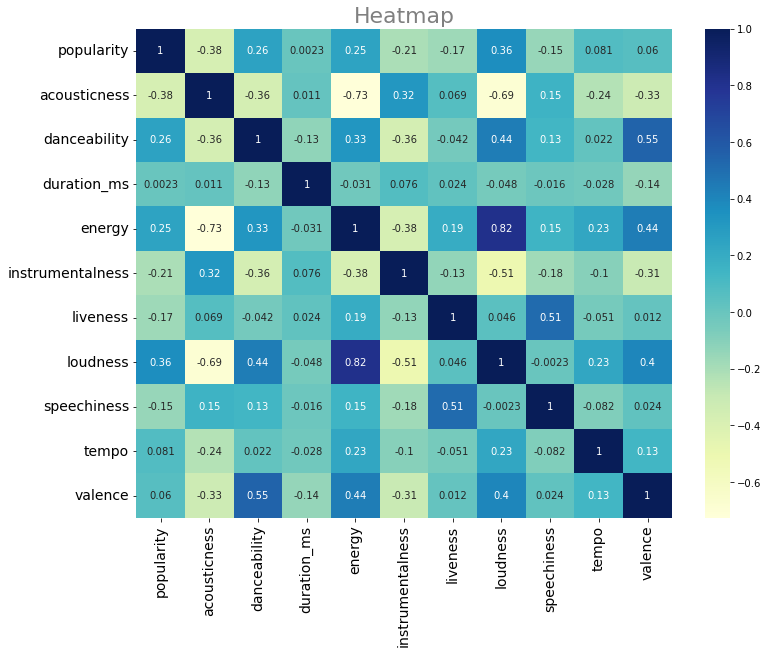

In [5]:
plt.figure(figsize = (12, 9))
sns.heatmap(data.drop(['genre','artist_name','track_name','track_id'], axis=1).corr(), annot=True, cmap='YlGnBu')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Heatmap', fontsize=22, color='grey')
plt.show()

In [6]:
# sum up popularity by genre and divide them by the number of songs in each genre
genre_popularity = data[['genre','track_id', 'popularity']]
genre_count = data.groupby('genre')[['popularity']].count().sort_values(by='popularity', ascending=True)
genre_sum = data.groupby('genre')[['popularity']].sum().sort_values(by='popularity', ascending=True)

genre_rank = genre_sum.popularity / genre_count.popularity
genre_rank = genre_rank.sort_values(ascending=True)
genre_rank = pd.DataFrame(genre_rank).reset_index()

print(genre_rank)

               genre  popularity
0   Children's Music    4.252637
1          A Capella    9.302521
2              Movie   12.174097
3              Opera   13.335628
4             Comedy   21.342630
5              Anime   24.258729
6                Ska   28.612351
7          Classical   29.282195
8         Soundtrack   33.954800
9              Blues   34.742879
10             World   35.524077
11            Reggae   35.589328
12         Reggaeton   37.742915
13        Electronic   38.056095
14              Jazz   40.824383
15           Country   46.100416
16              Soul   47.027836
17              Folk   49.940209
18       Alternative   50.213430
19               R&B   52.308719
20  Children’s Music   54.659040
21             Indie   54.701561
22             Dance   57.275256
23           Hip-Hop   58.423131
24              Rock   59.619392
25               Rap   60.533795
26               Pop   66.590667


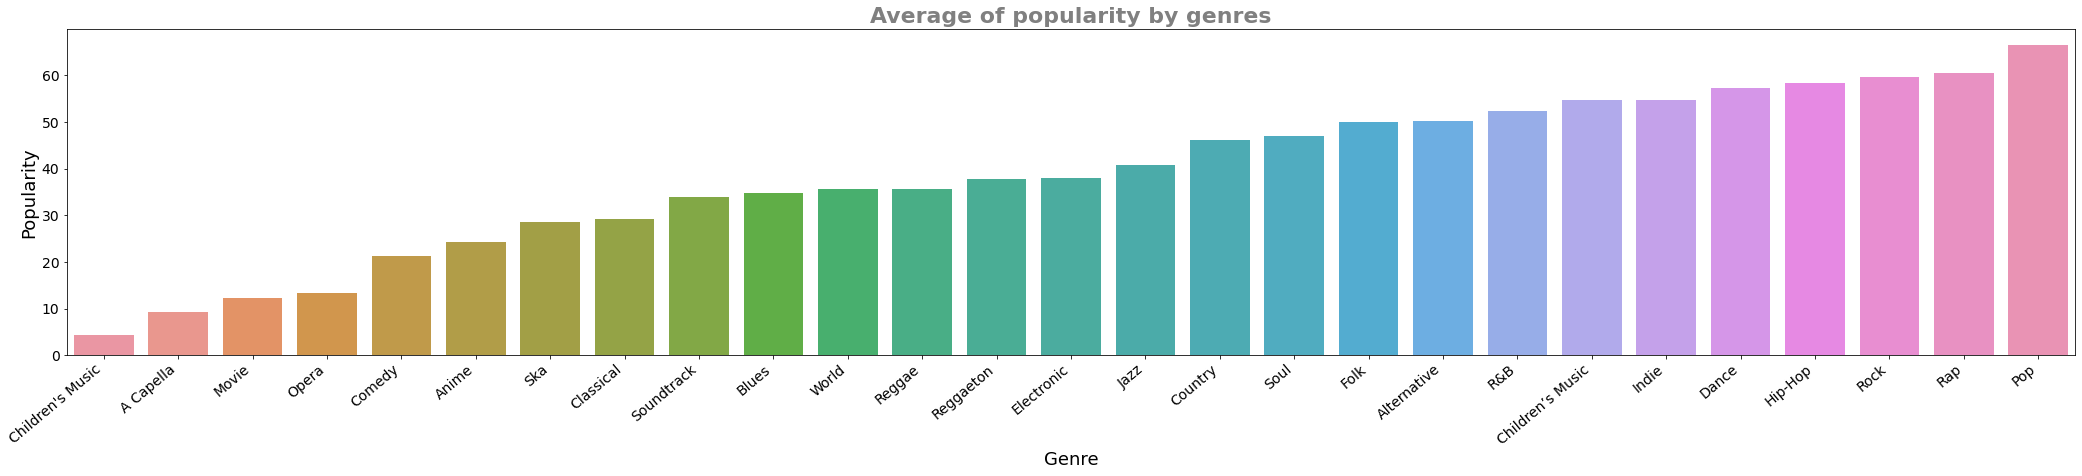

In [7]:
# Bar Chart by category and popularity
plt.figure(figsize = (36, 6))
sns.barplot(x='genre', y='popularity', data=genre_rank)

plt.xticks(fontsize=14, rotation=40,ha="right")
plt.yticks(fontsize=14)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Popularity', fontsize=18)
plt.title('Average of popularity by genres', fontweight='bold', fontsize=22, color='grey')
plt.show()

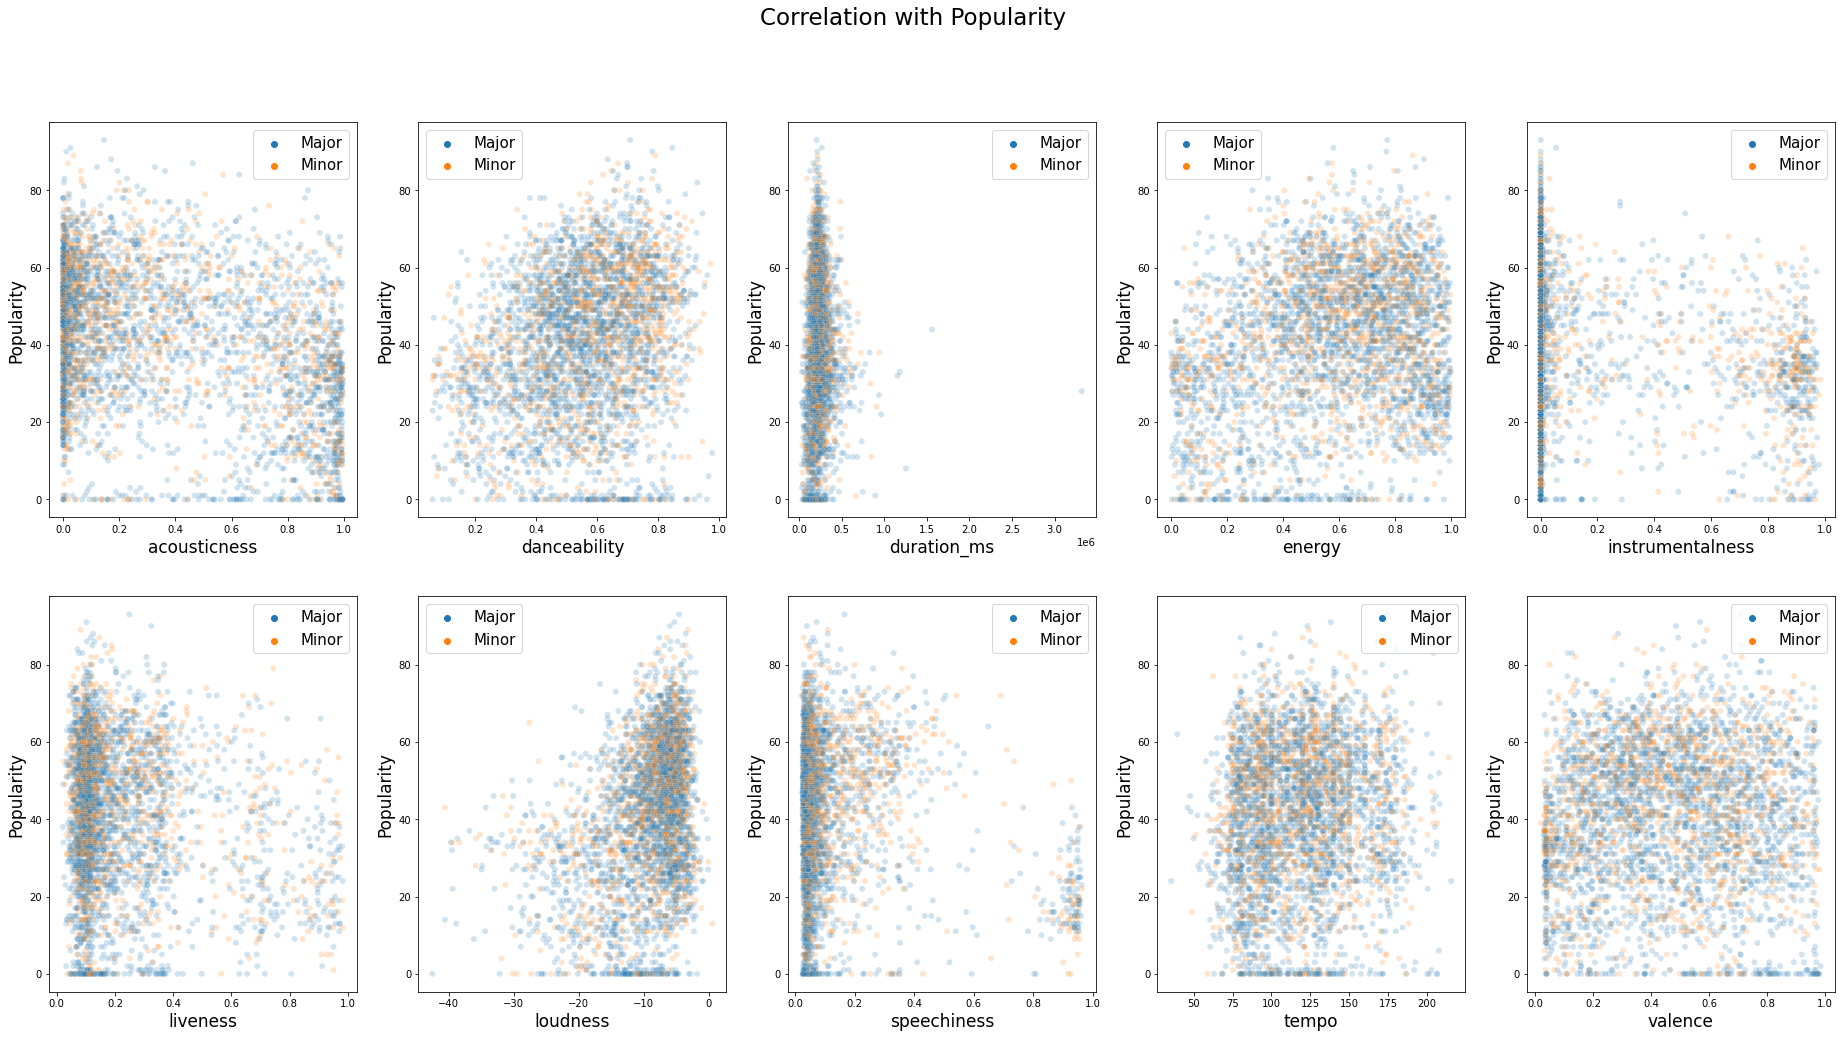

In [8]:
data_sub2 = data.sample(int(0.017*len(data)))

plt.figure(figsize=(32,16))
num1 = 1

for col in ["acousticness","danceability","duration_ms","energy","instrumentalness","liveness","loudness", "speechiness", "tempo", "valence"]:
    if num1<=10:
        ax = plt.subplot(2,5, num1)
        sns.scatterplot(x =col, y="popularity", data=data_sub2, hue='mode', legend = "full", alpha=0.2)
        plt.xlabel(col,fontsize = 17)
        plt.ylabel("Popularity",fontsize = 17)
        plt.legend(fontsize = 15)
    num1 +=1
plt.suptitle("Correlation with Popularity",fontsize = 23)
plt.show()

# Finding the song in dataset

In [9]:
def find_song(word,artist):
    a = 0
    b = 0
    for i in data["track_name"]:
        if word.lower() in i.lower() and artist.lower() in data["artist_name"][a].lower():
            print("Song Name: ",data["track_name"][a],", Artists: ",data["artist_name"][a])
            b+=1
        a+=1
    if b == 0:
        print("Nothing found. Please try something else :)")

In [10]:
word = "7 rings"
artist = "Ariana Grande"

find_song(word,artist)

Song Name:  7 rings , Artists:  Ariana Grande
Song Name:  7 rings (feat. 2 Chainz) - Remix , Artists:  Ariana Grande
Song Name:  7 rings , Artists:  Ariana Grande
Song Name:  7 rings (feat. 2 Chainz) - Remix , Artists:  Ariana Grande


# Cosine Distance

I used cosine distance to measure the distances between songs in my dataset. There is multiple ways to do this but cosine distance is highly recommended.

In [11]:
data = data.drop(["track_id","key","mode","time_signature"],1)
df = data.copy()
df = df.drop(["artist_name","track_name"],1)

C:\Users\user\AppData\Local\Temp/ipykernel_1800/1882814312.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(["track_id","key","mode","time_signature"],1)
C:\Users\user\AppData\Local\Temp/ipykernel_1800/1882814312.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["artist_name","track_name"],1)


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [14]:
col = ['popularity', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence']
scaler = StandardScaler()
df[col] = scaler.fit_transform(df[col])

In [15]:
encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
enc = pd.DataFrame(encoder.fit_transform(np.array(df["genre"]).reshape(-1,1)))
enc.columns = df["genre"].unique()

In [16]:
enc.head()

,Movie,R&B,A Capella,Alternative,Country,Dance,Electronic,Anime,Folk,Blues,...,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df[enc.columns] = enc
df = df.drop("genre",1)
df.head()

C:\Users\user\AppData\Local\Temp/ipykernel_1800/2038170020.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("genre",1)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World
0,-2.261007,0.683376,-0.890935,-1.141368,1.286908,-0.489819,0.660661,1.290703,-0.367970,1.595607,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.206031,-0.345467,0.191994,-0.821867,0.630249,-0.489819,-0.322835,0.668683,-0.183082,1.823253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2.096080,1.644570,0.585296,-0.545298,-1.669954,-0.489819,-0.564927,-0.718402,-0.455832,-0.588326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.261007,0.942701,-1.693703,-0.695295,-0.929789,-0.489819,-0.587623,-0.434817,-0.438044,1.750597,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.041104,1.638932,-1.203422,-1.282184,-1.313157,-0.083566,-0.065613,-1.930601,-0.405163,0.741433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df["name"] = data["track_name"]
df["artist"] = data["artist_name"]

df_2 = df.drop(["artist","name"],1)

C:\Users\user\AppData\Local\Temp/ipykernel_1800/3046086526.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_2 = df.drop(["artist","name"],1)


In [19]:
def sim_track_find(word, artist):
    a = 0
    b = 0
    song = []
    indexes = []
    for i in data["track_name"]:
        if word.lower() in i.lower() and artist.lower() in data["artist_name"][a].lower():
            song.append(df_2[a:a+1].values)
            indexes.append(a)
            b += 1
        a += 1
    if b == 0:
        print("Nothing found. Please try something else :)")
        return None
    elif len(song) > 0:
        return song[0][0], indexes[0]
    else:
        print("Error: song list is empty.")
        return None

In [20]:
word = "euphoria"
artist = "BTS"

sim_track_find(word,artist)

(array([ 1.97210984,  0.07170771,  0.44521577, -0.05471311,  0.86558361,
        -0.48981852, -0.61990188,  0.84206815, -0.46876884, -0.41009905,
         0.41175543,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]),
 108803)

# Finding similar songs to the required song

In [24]:
def similar_tracks(data,number,song = "",artist = ""):

    if (sim_track_find(song,artist) == 0):
        return 0
    else:
        x=sim_track_find(song,artist)[0]
        index = sim_track_find(song,artist)[1]
    p = []
    count=0
    for i in df_2.values:
        p.append([distance.cosine(x,i),count])
        count+=1
    p.sort()
    song_names = df["name"]
    artist_names = df["artist"]

    print("\nSimilar songs to ",song_names[index]," by ", artist_names[index],"\n")
    for i in range(1,number+1):
        print(i,"- ",song_names[p[i][1]],", ",artist_names[p[i][1]])

In [25]:
song = "coffee"
artist = "BTS"
num = 5

similar_tracks(df,int(num),song,artist)


Similar songs to  Coffee  by  BTS 

1 -  Tonight (Best You Ever Had) ,  John Legend
2 -  I'm Not Famous ,  AJR
3 -  Body on Me ,  Rita Ora
4 -  Mama Said ,  Lukas Graham
5 -  Never Say Never ,  Justin Bieber


In [26]:
song = "Show You"
artist = "Shawn Mendes"
num = 5

similar_tracks(df,int(num),song,artist)


Similar songs to  Show You  by  Shawn Mendes 

1 -  Superstar - Confessions Special Edition Version ,  Usher
2 -  Bacon ,  Nick Jonas
3 -  Shorty (Got Her Eyes on Me) ,  Donell Jones
4 -  Kamikaze ,  MØ
5 -  No More ,  PRETTYMUCH


In [27]:
song = "euphoria"
artist = "BTS"
num = 10

similar_tracks(df,int(num),song,artist)


Similar songs to  Euphoria  by  BTS 

1 -  Sleep Talking ,  Charlotte Lawrence
2 -  Take Her Place (feat. A R I Z O N A) ,  Don Diablo
3 -  Polaroid ,  Jonas Blue
4 -  Teenage Dirtbag ,  Wheatus
5 -  FRIENDS ,  Marshmello
6 -  Rayando El Sol ,  Maná
7 -  Shape of My Heart ,  Backstreet Boys
8 -  Egotistic ,  Mamamoo
9 -  Apologize ,  OneRepublic
10 -  Way Back Home ,  SHAUN


# Final Comments

In the project if it cannot find any similar songs in the dataset, it will give you a message. It is important to handle errors. And in the function it takes some arguments. But if you don't want to enter a song name or an artist name, it takes none for that and find the closest song acording to your input.